In [1]:
import torch
import matplotlib.pyplot as plt

# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


In [2]:
# learn texture from image
from modules.Renderer import Renderer
from modules.utils import remove_background ,squared_image

verts_T_paths = ['data/verts_T/0002_c1s2_064446_01.pkl']
# verts_T_paths = ['data/verts_T/0002_c2s1_123141_01.pkl']
euler_list = [[0,0,0]]#,[0,0,180]]

tm_paths = ['data/meta/default_texture.jpg']
# tm_paths = ['changed_texture_fpp_1.jpg']

image_path = 'data/images/0002_c1s2_064446_01.jpg'
seg_mask_path = "data/seg/0002_c1s2_064446_01.png" 

In [3]:
path = 'data/meta/standard_body.pkl'
# check if exists 
import os
if not os.path.exists(path):
    print("standard body not found. run setup.py")
    

In [4]:
renderer = Renderer(image_resolution=128)
renderer.load_inputs(verts_T_paths,tm_paths = tm_paths,
                     euler_list = euler_list)
images = renderer.render()

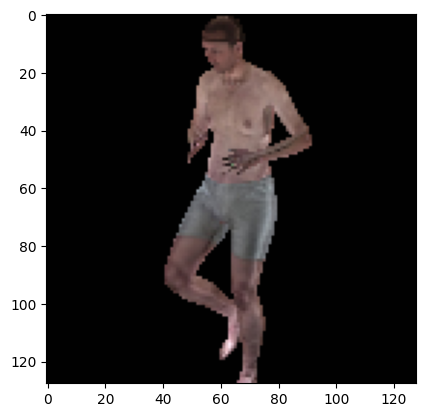

In [5]:
renderer.show()

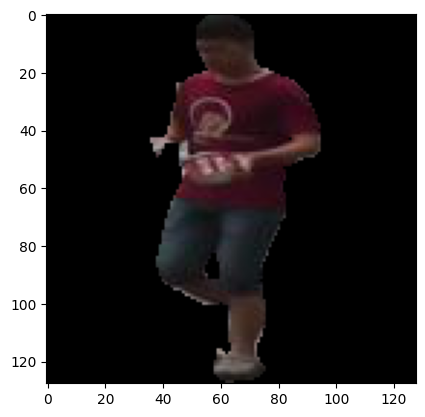

In [6]:

tgt = remove_background(image_path,seg_mask_path)
tgt = squared_image(tgt)
plt.imshow(tgt)

In [7]:
diff = images[0,...,:3] - torch.from_numpy(tgt).to(device)
loss = torch.sum(diff**2)
loss.backward()

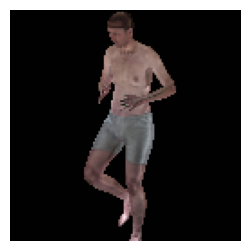

loss: 862.4605676814413


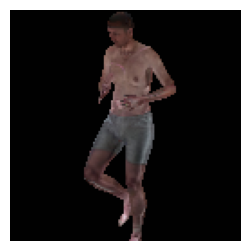

loss: 503.9922974542838


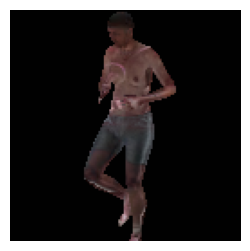

loss: 336.3154604272322


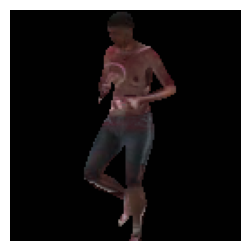

loss: 262.0963995600111


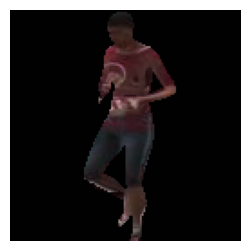

loss: 230.99776004713533


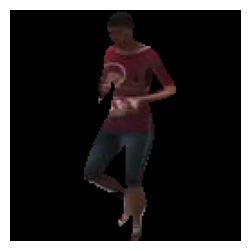

loss: 218.57503235863828


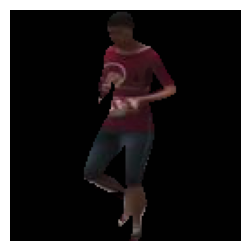

loss: 213.70564159130353


In [8]:
# training loop to learn texture and T from image
params = [ renderer.texture_map] #renderer.verts,renderer.T
optim = torch.optim.Adam(params,lr=0.1)
for i in range(2000):
    optim.zero_grad()
    images = renderer.render()
    diff = images[0,...,:3] - torch.from_numpy(tgt).to(device)
    loss = torch.sum(diff**2)
    loss.backward()
    optim.step()
    # print(loss.item())
    if i%300 == 0:
        plt.figure(figsize=(3,3))
        plt.imshow(images[0,...,:3].cpu().detach().numpy().clip(0,1))
        plt.axis('off')
        plt.show()
        
        # print(renderer.T)
        # print(renderer.texture_map)
        # print(renderer.verts)
        print('loss:',loss.item())
 


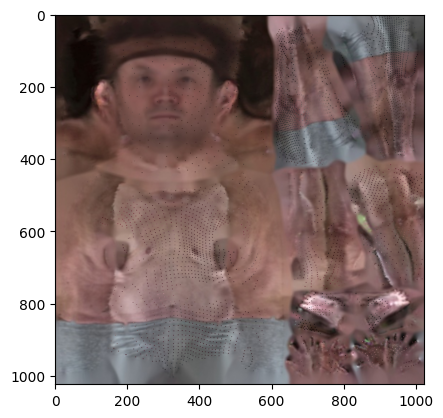

In [13]:
import numpy as np
texture = renderer.texture_map.cpu().detach().numpy()[0]
texture = texture/255
# texture = np.transpose(texture,(1,2,0))
plt.imshow(texture.clip(0,1))


In [11]:
# save texture
plt.imsave("data/exp/changed_texture.jpg",texture.clip(0,1))